<a href="https://colab.research.google.com/github/chltjs1921/2024_modeling_practice/blob/main/Drug_target_interaction(DTI)_prediction_using_Sequence_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import json
import numpy as np

In [ ]:
!unzip '/content/drive/MyDrive/FastCampus/Medical/Part 3/실습/DAVIS.zip' -d '/content/drive/MyDrive/FastCampus/Medical/Part 3/실습/'

Archive:  /content/drive/MyDrive/FastCampus/Medical/Part 3/실습/DAVIS.zip
   creating: /content/drive/MyDrive/FastCampus/Medical/Part 3/실습/DAVIS/
  inflating: /content/drive/MyDrive/FastCampus/Medical/Part 3/실습/DAVIS/affinity.txt  
  inflating: /content/drive/MyDrive/FastCampus/Medical/Part 3/실습/__MACOSX/DAVIS/._affinity.txt  
  inflating: /content/drive/MyDrive/FastCampus/Medical/Part 3/실습/DAVIS/SMILES.txt  
  inflating: /content/drive/MyDrive/FastCampus/Medical/Part 3/실습/__MACOSX/DAVIS/._SMILES.txt  
  inflating: /content/drive/MyDrive/FastCampus/Medical/Part 3/실습/DAVIS/target_seq.txt  
  inflating: /content/drive/MyDrive/FastCampus/Medical/Part 3/실습/__MACOSX/DAVIS/._target_seq.txt  


In [ ]:
affinity = pd.read_csv('/content/drive/MyDrive/FastCampus/Medical/Part 3/실습/DAVIS/affinity.txt', header=None, sep=' ')

with open('/content/drive/MyDrive/FastCampus/Medical/Part 3/실습/DAVIS/target_seq.txt') as f:
    target = json.load(f)
    target = list(target.values())

with open('/content/drive/MyDrive/FastCampus/Medical/Part 3/실습/DAVIS/SMILES.txt') as f:
    drug = json.load(f)
    drug = list(drug.values())

In [ ]:
print(affinity.shape)
affinity.head()

(68, 442)


,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
0,43.0,10000.0,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0,10000.0,10000.00,...,10000,10000,10000,10000,10000,10000.0,10000,230.0,10000.0,10000
1,10000.0,10000.0,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0,10000.0,10000.00,...,10000,10000,10000,10000,10000,10000.0,10000,2000.0,10000.0,10000
2,10000.0,75.0,1.9,13.0,0.77,13.0,2.6,31.0,34.0,0.93,...,10000,10000,10000,10000,10000,260.0,1200,120.0,2.3,10000
3,10000.0,10000.0,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0,10000.0,10000.00,...,10000,10000,10000,10000,10000,10000.0,10000,10000.0,10000.0,10000
4,10000.0,420.0,2900.0,750.0,580.00,230.0,500.0,500.0,1200.0,790.00,...,10000,10000,10000,10000,10000,10000.0,10000,10000.0,10000.0,10000


In [ ]:
affinity.describe()

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,6305.710294,4786.038882,6776.396029,6157.742956,5368.200176,5076.213941,3662.326721,4603.582397,4621.454015,4351.749309,...,8199.426471,9174.279412,8509.647059,8989.588235,9681.838235,5118.126471,8046.602941,3241.946765,6886.200000,8798.838235
std,4502.267160,4755.621867,4071.977775,4317.135465,4538.166881,4586.191949,4403.584967,4605.842183,4752.974206,4717.341321,...,3384.862965,2458.183712,3181.048615,2741.635062,1683.615935,4627.492704,3430.533809,4272.287089,4264.491886,2973.932873
min,1.200000,0.047000,0.100000,0.041000,0.032000,0.019000,0.025000,0.046000,0.016000,0.037000,...,71.000000,57.000000,13.000000,24.000000,55.000000,0.300000,12.000000,0.520000,2.300000,16.000000
25%,892.500000,123.750000,2775.000000,1075.000000,632.500000,270.000000,45.000000,64.000000,59.000000,99.250000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,260.000000,7100.000000,50.250000,1775.000000,10000.000000
50%,10000.000000,2050.000000,10000.000000,10000.000000,4250.000000,2800.000000,960.000000,2500.000000,1800.000000,865.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,4350.000000,10000.000000,490.000000,10000.000000,10000.000000
75%,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
max,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000


In [ ]:
print(len(target), target[0])
print(len(drug), drug[0])

442 MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNLARSLLLVDQLIDL
68 CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
SMILES = []
Target_seq = []
y = []

for i in range(len(drug)):
    for j in range(len(target)):
        SMILES.append(drug[i])
        Target_seq.append(target[j])
        y.append(affinity.iloc[i, j])

In [ ]:
th = 300

y = [1 if i else 0 for i in np.array(y) < th]

In [ ]:
All_data_dic = {'SMILES': SMILES, 'Target_seq': Target_seq, 'Label': y}
df_data = pd.DataFrame(All_data_dic)

In [ ]:
df_data

,SMILES,Target_seq,Label
0,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,1
1,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0
2,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0
3,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0
4,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0
...,...,...,...
30051,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,0
30052,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,0
30053,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,0
30054,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

counts = df_data['Label'].value_counts()
counts

Label
0    26434
1     3622
Name: count, dtype: int64

<ipython-input-16-33f1bcd132d7>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x)


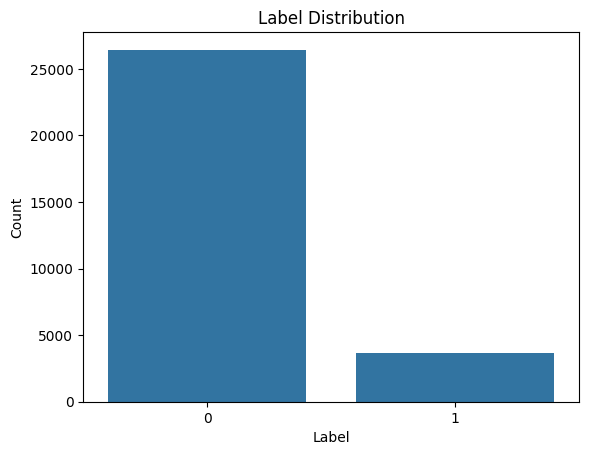

In [ ]:
x = np.array([0, 1])

ax = plt.subplot()
sns.barplot(counts)
ax.set_xticklabels(x)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.show()

In [ ]:
# 아미노산 charater 정의
amino_char = ['?', 'A', 'C', 'B', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'M', 'L', 'O',
       'N', 'Q', 'P', 'S', 'R', 'U', 'T', 'W', 'V', 'Y', 'X', 'Z']

# SMILES character 정의
smiles_char = ['?', '#', '%', ')', '(', '+', '-', '.', '1', '0', '3', '2', '5', '4',
       '7', '6', '9', '8', '=', 'A', 'C', 'B', 'E', 'D', 'G', 'F', 'I',
       'H', 'K', 'M', 'L', 'O', 'N', 'P', 'S', 'R', 'U', 'T', 'W', 'V',
       'Y', '[', 'Z', ']', '_', 'a', 'c', 'b', 'e', 'd', 'g', 'f', 'i',
       'h', 'm', 'l', 'o', 'n', 's', 'r', 'u', 't', 'y']

enc_protein = OneHotEncoder().fit(np.array(amino_char).reshape(-1, 1))
enc_smiles = OneHotEncoder().fit(np.array(smiles_char).reshape(-1, 1))

MAX_SEQ_PROTEIN = 1000
MAX_SEQ_DRUG = 100

In [ ]:
def trans_drug(x):
    temp = list(x)
    temp = [i if i in smiles_char else '?' for i in temp]

    if len(temp) < MAX_SEQ_DRUG:
        temp += ['?'] * (MAX_SEQ_DRUG - len(temp))
    else:
        temp = temp[:MAX_SEQ_DRUG]

    return temp

In [ ]:
def trans_protein(x):
    temp = list(x.upper())
    temp = [i if i in amino_char else '?' for i in temp]

    if len(temp) < MAX_SEQ_PROTEIN:
        temp = temp + ['?'] * (MAX_SEQ_PROTEIN-len(temp))
    else:
        temp = temp [:MAX_SEQ_PROTEIN]

    return temp

In [ ]:
unique_drug = pd.Series(df_data['SMILES'].unique()).apply(trans_drug)

unique_dict = dict(zip(df_data['SMILES'].unique(), unique_drug))

df_data["drug_encoding"] = [unique_dict[i] for i in df_data["SMILES"]]

In [ ]:
AA = pd.Series(df_data['Target_seq'].unique()).apply(trans_protein)

AA_dict = dict(zip(df_data['Target_seq'].unique(), AA))

df_data["target_encoding"] = [AA_dict[i] for i in df_data["Target_seq"]]

In [ ]:
def create_fold(df, fold_seed, frac):
    train_frac, val_frac, test_frac = frac

    test = df.sample(frac=test_frac, replace=False, random_state=fold_seed)
    train_val = df.drop(test.index)

    val = train_val.sample(frac=val_frac/(val_frac+train_frac), replace=False, random_state=fold_seed)
    train = train_val.drop(val.index)

    return train, val, test

In [ ]:
train, val, test = create_fold(df_data, 42, [0.7, 0.1, 0.2])

In [ ]:
print(len(train), len(val), len(test))

21039 3006 6011


In [ ]:
def drug_2_embed(x):
    return enc_smiles.transform(np.array(x).reshape(-1, 1)).toarray().T

def protein_2_embed(x):
    return enc_protein.transform(np.array(x).reshape(-1, 1)).toarray().T

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
class data_preprocess_loader(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        drug = self.df.iloc[idx]['drug_encoding']
        v_d = drug_2_embed(drug)
        protein = self.df.iloc[idx]['target_encoding']
        v_p = protein_2_embed(protein)
        y = self.df.iloc[idx]['Label']

        return v_d, v_p, y

In [ ]:
train_dataset = data_preprocess_loader(train)
val_dataset = data_preprocess_loader(val)
test_dataset = data_preprocess_loader(test)

In [ ]:
for(v_d, v_p, y) in train_dataset:
    print(v_d.shape, v_p.shape, y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 0
(63, 100) (26, 1000) 

In [ ]:
params = {'batch_size':256, 'shuffle':True, 'num_workers':1, 'drop_last':False}

train_loader = DataLoader(train_dataset, **params)
val_loader = DataLoader(val_dataset, **params)
test_loader = DataLoader(test_dataset, **params)

In [ ]:
for(v_d, v_p, y) in train_loader:
    print(v_d.shape, v_p.shape, y)
    drug_demo = v_d
    protein_demo = v_p
    affinity_demo = y
    break

torch.Size([256, 63, 100]) torch.Size([256, 26, 1000]) tensor([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
inp = drug_demo.double().to(device)
print(inp.shape)

torch.Size([256, 63, 100])


In [ ]:
conv1 = nn.Conv1d(in_channels=63, out_channels=32, kernel_size=4).double().to(device)
drug_after_conv1 = F.relu(conv1(inp))
print(list(drug_after_conv1.shape))

conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=6).double().to(device)
drug_after_conv2 = F.relu(conv2(drug_after_conv1))
print(list(drug_after_conv2.shape))

conv3 = nn.Conv1d(in_channels=64, out_channels=96, kernel_size=8).double().to(device)
drug_after_conv3 = F.relu(conv3(drug_after_conv2))
print(list(drug_after_conv3.shape))

[256, 32, 97]
[256, 64, 92]
[256, 96, 85]


In [ ]:
rnn_drug_n_layers = 2
rnn_drug_hid_dim = 64
hidden_dim_drug = 256

rnn = nn.GRU(input_size=96, hidden_size=rnn_drug_hid_dim, num_layers=rnn_drug_n_layers, batch_first=True, bidirectional=True).double().to(device)

emb = drug_after_conv3.to(device)

batch_size = emb.size(0)
emb = emb.view(batch_size, emb.size(2), -1)
print(list(emb.shape)) #RNN 입력값

[256, 85, 96]


In [ ]:
direction = 2

h0 = torch.randn(rnn_drug_n_layers*direction, batch_size, rnn_drug_hid_dim).double().to(device)
print(list(h0.shape))

v, hn = rnn(emb, h0)

print(list(v.shape))

[4, 256, 64]
[256, 85, 128]


In [ ]:
fc1 = nn.Linear(rnn_drug_hid_dim*direction*85, hidden_dim_drug).to(device)
v = torch.flatten(v, 1)
v = fc1(v.float())
print(list(v.shape))

[256, 256]


In [ ]:
config = {
    # drug 설정
    "cnn_drug_filters" : [32,64,96],
    "cnn_drug_kernels" : [4,6,8],
    "hidden_dim_drug" : 256,
    "rnn_drug_hid_dim" : 64,
    "rnn_drug_n_layers" : 2,
    "rnn_drug_bidirectional" : True,
    "rnn_Use_GRU_LSTM_target" : 'GRU',

    # protein 설정
    "cnn_target_filters" : [32,64,96],
    "cnn_target_kernels" : [4,8,12],
    "hidden_dim_protein" : 256,
    "rnn_target_hid_dim" : 64,
    "rnn_target_n_layers" : 2,
    "rnn_target_bidirectional" : True,
    "rnn_Use_GRU_LSTM_drug" : 'GRU',

    # Classfier 설정
    "cls_hidden_dims" : [1024, 1024, 512]
    }

In [ ]:
class CNN_RNN(nn.Sequential):
	"""CNN과 RNN을 이용하여 특성 추출(feature extration)
	"""
	def __init__(self, encoding, **config):
		super(CNN_RNN, self).__init__()

		if encoding == 'drug':
			"""
			CNN 구현
			"""
			# 레이어 별 CNN 필터 개수
			in_ch = [63] + config['cnn_drug_filters']
			self.in_ch = in_ch[-1] # 마지막 convolution 층 필터 개수

			# 레이어 별 CNN kernel 사이즈
			kernels = config['cnn_drug_kernels']

			# 전체 CNN Layer 개수
			layer_size = len(config['cnn_drug_filters'])

			self.conv = nn.ModuleList([nn.Conv1d(in_channels = in_ch[i], # input 채널 수
													out_channels = in_ch[i+1], # output 채널 수
													kernel_size = kernels[i]) for i in range(layer_size)]) # kernel 사이즈
			self.conv = self.conv.double()

			# 마지막 층 사이즈 구하기
			n_size_d = self._get_conv_output((63, 100)) # auto get the seq_len of CNN output

			"""
			RNN 구현 (LSTM / GRU)
			"""
			if config['rnn_Use_GRU_LSTM_drug'] == 'LSTM':
				self.rnn = nn.LSTM(input_size = in_ch[-1], # input feature 사이즈 (convolution 이 후 채널 개수)
								hidden_size = config['rnn_drug_hid_dim'], # hidden feature 사이즈
								num_layers = config['rnn_drug_n_layers'], # recurrent layer 개수
								batch_first = True, # If True, (batch, seq, feature) Else, (seq, batch, feature)
								bidirectional = config['rnn_drug_bidirectional']) # If True, Bidirectional LSTM

			elif config['rnn_Use_GRU_LSTM_drug'] == 'GRU':
				self.rnn = nn.GRU(input_size = in_ch[-1], # input feature 사이즈 (convolution 이 후 채널 개수)
								hidden_size = config['rnn_drug_hid_dim'], # hidden feature 사이즈
								num_layers = config['rnn_drug_n_layers'], # recurrent layer 개수
								batch_first = True, # If True, (batch, seq, feature) Else, (seq, batch, feature
								bidirectional = config['rnn_drug_bidirectional']) # If True, Bidirectional LSTM
			else:
				raise AttributeError('Please use LSTM or GRU.')

			direction = 2 if config['rnn_drug_bidirectional'] else 1
			self.rnn = self.rnn.double()

			# 마지막 drug 임베딩 층
			self.fc1 = nn.Linear(config['rnn_drug_hid_dim'] * direction * n_size_d, config['hidden_dim_drug'])

		if encoding == 'protein':
			"""
			CNN 구현
			"""
			# 레이어 별 CNN 필터 개수
			in_ch = [26] + config['cnn_target_filters']
			self.in_ch = in_ch[-1]

			# 레이어 별 CNN kernel 사이즈
			kernels = config['cnn_target_kernels']

			# 전체 CNN Layer 개수
			layer_size = len(config['cnn_target_filters'])

			self.conv = nn.ModuleList([nn.Conv1d(in_channels = in_ch[i], # input 채널 수
													out_channels = in_ch[i+1], # output 채널 수
													kernel_size = kernels[i]) for i in range(layer_size)]) # kernel 사이즈
			self.conv = self.conv.double()

			# 마지막 층 사이즈 구하기
			n_size_p = self._get_conv_output((26, 1000))

			"""
			RNN 구현 (LSTM / GRU)
			"""
			if config['rnn_Use_GRU_LSTM_target'] == 'LSTM':
				self.rnn = nn.LSTM(input_size = in_ch[-1], # input feature 사이즈 (convolution 이 후 채널 개수)
								hidden_size = config['rnn_target_hid_dim'], # hidden feature 사이즈
								num_layers = config['rnn_target_n_layers'], # recurrent layer 개수
								batch_first = True, # If True, (batch, seq, feature) Else, (seq, batch, feature)
								bidirectional = config['rnn_target_bidirectional']) # If True, Bidirectional LSTM

			elif config['rnn_Use_GRU_LSTM_target'] == 'GRU':
				self.rnn = nn.GRU(input_size = in_ch[-1],
								hidden_size = config['rnn_target_hid_dim'],
								num_layers = config['rnn_target_n_layers'],
								batch_first = True,
								bidirectional = config['rnn_target_bidirectional'])
			else:
				raise AttributeError('Please use LSTM or GRU.')

			direction = 2 if config['rnn_target_bidirectional'] else 1
			self.rnn = self.rnn.double()

			# 마지막 protein 임베딩 층
			self.fc1 = nn.Linear(config['rnn_target_hid_dim'] * direction * n_size_p, config['hidden_dim_protein'])

		self.encoding = encoding
		self.config = config

	def _get_conv_output(self, shape):
		"""마지막
		"""
		bs = 1
		input = Variable(torch.rand(bs, *shape))
		output_feat = self._forward_features(input.double())
		n_size = output_feat.data.view(bs, self.in_ch, -1).size(2)
		return n_size

	def _forward_features(self, x):
		for l in self.conv:
			x = F.relu(l(x))
		return x

	def forward(self, v):
		v = self._forward_features(v.double())

		batch_size = v.size(0)
		v = v.view(batch_size, v.size(2), -1)
  		# drug: [256, 96, 85] -> [256, 85, 96]
		# protein: [256, 96, 979] -> [256, 979, 96]

		if self.encoding == 'protein':
			if self.config['rnn_Use_GRU_LSTM_target'] == 'LSTM':
				direction = 2 if self.config['rnn_target_bidirectional'] else 1
				h0 = torch.randn(self.config['rnn_target_n_layers'] * direction, batch_size, self.config['rnn_target_hid_dim']).to(device) # Initialize hidden state
				c0 = torch.randn(self.config['rnn_target_n_layers'] * direction, batch_size, self.config['rnn_target_hid_dim']).to(device) # Initialize cell state
				v, (hn, cn) = self.rnn(v.double(), (h0.double(), c0.double()))
			else:
				# GRU
				direction = 2 if self.config['rnn_target_bidirectional'] else 1
				h0 = torch.randn(self.config['rnn_target_n_layers'] * direction, batch_size, self.config['rnn_target_hid_dim']).to(device)
				v, hn = self.rnn(v.double(), h0.double())
		else:
			if self.config['rnn_Use_GRU_LSTM_drug'] == 'LSTM':
				direction = 2 if self.config['rnn_drug_bidirectional'] else 1
				h0 = torch.randn(self.config['rnn_drug_n_layers'] * direction, batch_size, self.config['rnn_drug_hid_dim']).to(device) # Initialize hidden state
				c0 = torch.randn(self.config['rnn_drug_n_layers'] * direction, batch_size, self.config['rnn_drug_hid_dim']).to(device) # Initialize cell state
				v, (hn, cn) = self.rnn(v.double(), (h0.double(), c0.double()))
			else:
				# GRU
				direction = 2 if self.config['rnn_drug_bidirectional'] else 1
				h0 = torch.randn(self.config['rnn_drug_n_layers'] * direction, batch_size, self.config['rnn_drug_hid_dim']).to(device)
				v, hn = self.rnn(v.double(), h0.double())

		v = torch.flatten(v, 1)
		v = self.fc1(v.float())
		return v

In [ ]:
class Classifier(nn.Sequential):
	"""
	임베딩 된 drug와 protein을 이용하여 classificaion
	"""
	def __init__(self, model_drug, model_protein, **config):
		"""
		Args:
			model_drug: drug emedding 모델
			model_protein: protein emedding 모델
			config: 모델 설정 값
		"""
		super(Classifier, self).__init__()

		self.input_dim_drug = config['hidden_dim_drug'] # drug feature 사이즈
		self.input_dim_protein = config['hidden_dim_protein'] # protein feature 사이즈

		self.model_drug = model_drug # drug 임베딩 모델
		self.model_protein = model_protein # protein 임베딩 모델

		self.dropout = nn.Dropout(0.1) # dropout 적용

		self.hidden_dims = config['cls_hidden_dims'] # classifier hidden dimensions
		layer_size = len(self.hidden_dims) + 1 # hidden layer 개수
		dims = [self.input_dim_drug + self.input_dim_protein] + self.hidden_dims + [1] # ["합쳐진 feature 차원 (drug + protein), hidden1, hidden2, hidden3, 1 (output layer)]

		self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)]) # classifer layers

	def forward(self, v_D, v_P):
		# Drug/protein 임베딩
		v_D = self.model_drug(v_D)
		v_P = self.model_protein(v_P)

		# drug - protein feature 합치기
		v_f = torch.cat((v_D, v_P), 1)

		for i, l in enumerate(self.predictor):
			if i == (len(self.predictor)-1):
				# If last layer,
				v_f = l(v_f)
			else:
				# If Not last layer, dropout과 ReLU 적용
				v_f = F.relu(self.dropout(l(v_f)))

		return v_f

In [ ]:
model_drug = CNN_RNN('drug', **config).to(device)
model_protein = CNN_RNN('protein', **config).to(device)
model = Classifier(model_drug, model_protein, **config).to(device)

In [ ]:
import copy
from prettytable import PrettyTable
from time import time

from sklearn.metrics import mean_squared_error, roc_auc_score, average_precision_score, f1_score, log_loss

In [ ]:
learning_rate = 0.001
weight_decay = 0.00001
train_epoch = 15

In [ ]:
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
sigmoid = torch.nn.Sigmoid()

In [ ]:
def get_metrics(y_label, y_pred):
    auc = roc_auc_score(y_label, y_pred)
    ap = average_precision_score(y_label, y_pred)
    f1 = f1_score(y_label, y_pred)
    loss = log_loss(y_label, y_pred)

    return auc, ap, f1, loss

In [ ]:
loss_history = []

max_auc = 0 # 최고 AUC 저장
model_max = copy.deepcopy(model) # 최고 AUC 저장

valid_metric_record = [] # 각 metrics 저장
valid_metric_header = ["# epoch"]
valid_metric_header.extend(["AUROC", "AUPRC", "F1"])

table = PrettyTable(valid_metric_header)

float2str = lambda x:'%0.4f'%x  # float 자료 형 str로 만들기 (소숫점 4자리까지)

print('--- Go for Training ---')
t_start = time()


for epoch in range(train_epoch):
    # Training
    model.train()

    for i, (v_d, v_p, label) in enumerate(train_loader):
        v_p = v_p.float().to(device)
        v_d = v_d.float().to(device)

        # 순전파 (forward-pass)
        score = model(v_d, v_p)
        label = Variable(torch.from_numpy(np.array(label)).float()).to(device) # label numpy -> torch tensor

        # 모델 아웃풋 score -> probability
        n = torch.squeeze(sigmoid(score), 1)

        # 손실 값(loss) 계산
        loss = loss_fn(n, label)
        loss_history.append(loss.item()) # loss 기록

        optimizer.zero_grad() # gradient 초기화
        loss.backward() # back propagation
        optimizer.step() # parameter 업데이트

    # Validation
    model.eval()
    with torch.set_grad_enabled(False):
        y_pred = []
        y_label = []

        for i, (v_d, v_p, label) in enumerate(val_loader):
            v_p = v_p.float().to(device)
            v_d = v_d.float().to(device)

            # 순전파 (forward-pass)
            score = model(v_d, v_p)

            logits = torch.squeeze(sigmoid(score)).detach().cpu().numpy() # 예측 확률
            label_ids = label.to('cpu').numpy() # 참 값

            y_label = y_label + label_ids.flatten().tolist()
            y_pred = y_pred + logits.flatten().tolist()

    # 예측 값
    outputs = np.asarray([1 if i else 0 for i in (np.asarray(y_pred) >= 0.5)])

    # model evaluation
    auc, auprc, f1, lloss = get_metrics(y_label, outputs)

    lst = ["epoch " + str(epoch)] + list(map(float2str,[auc, auprc, f1]))
    valid_metric_record.append(lst)

    if auc > max_auc:
        # 이전 epoch 보다 AUC 좋아지면 model_max, max_auc 갱신
        model_max = copy.deepcopy(model)
        max_auc = auc

    print('Validation at Epoch '+ str(epoch + 1) + ', AUROC: ' + str(auc)[:7] + \
            ' , AUPRC: ' + str(auprc)[:7] + ' , F1: '+str(f1)[:7] + ' , Cross-entropy Loss: ' + \
            str(lloss)[:7])


    table.add_row(lst)

--- Go for Training ---
Validation at Epoch 1, AUROC: 0.54915 , AUPRC: 0.17180 , F1: 0.18390 , Cross-entropy Loss: 4.25665
Validation at Epoch 2, AUROC: 0.52755 , AUPRC: 0.15939 , F1: 0.10687 , Cross-entropy Loss: 4.20869
Validation at Epoch 3, AUROC: 0.68754 , AUPRC: 0.29835 , F1: 0.47488 , Cross-entropy Loss: 4.13674
Validation at Epoch 4, AUROC: 0.59776 , AUPRC: 0.24259 , F1: 0.32067 , Cross-entropy Loss: 3.86096
Validation at Epoch 5, AUROC: 0.66099 , AUPRC: 0.30784 , F1: 0.45438 , Cross-entropy Loss: 3.65712
Validation at Epoch 6, AUROC: 0.65530 , AUPRC: 0.30461 , F1: 0.44525 , Cross-entropy Loss: 3.64513
Validation at Epoch 7, AUROC: 0.63294 , AUPRC: 0.28878 , F1: 0.40392 , Cross-entropy Loss: 3.64513
Validation at Epoch 8, AUROC: 0.71937 , AUPRC: 0.36344 , F1: 0.54263 , Cross-entropy Loss: 3.53721
Validation at Epoch 9, AUROC: 0.62842 , AUPRC: 0.28718 , F1: 0.39520 , Cross-entropy Loss: 3.63314
Validation at Epoch 10, AUROC: 0.66270 , AUPRC: 0.31900 , F1: 0.46181 , Cross-entropy

In [ ]:
model.eval()

y_pred = []
y_label = []
y_outputs = []

for i, (v_d, v_p, label) in enumerate(test_loader):
    v_p = v_p.float().to(device)
    v_d = v_d.float().to(device)

    # 순전파(forward-pass)
    score = model(v_d, v_p)
    logits = torch.squeeze(sigmoid(score)).detach().cpu().numpy()

    label_ids = label.to('cpu').numpy()
    y_label = y_label + label_ids.flatten().tolist()
    y_pred = y_pred + logits.flatten().tolist()
    outputs = np.asarray([1 if i else 0 for i in (np.asarray(y_pred) >= 0.5)])

    y_outputs.append(outputs)

    auc, auprc, f1, lloss = get_metrics(y_label, outputs)

    print('Test result - ' + ', AUROC: ' + str(auc)[:7] + ' , AUPRC: ' + str(auprc)[:7] + ' , F1: '+str(f1)[:7] + ' , Cross-entropy Loss: ' + str(loss)[:7])

Test result - , AUROC: 0.77658 , AUPRC: 0.42795 , F1: 0.62222 , Cross-entropy Loss: tensor(
Test result - , AUROC: 0.76164 , AUPRC: 0.38664 , F1: 0.58119 , Cross-entropy Loss: tensor(
Test result - , AUROC: 0.74527 , AUPRC: 0.39118 , F1: 0.57861 , Cross-entropy Loss: tensor(
Test result - , AUROC: 0.76352 , AUPRC: 0.40444 , F1: 0.59715 , Cross-entropy Loss: tensor(
Test result - , AUROC: 0.76498 , AUPRC: 0.40714 , F1: 0.6 , Cross-entropy Loss: tensor(
Test result - , AUROC: 0.75825 , AUPRC: 0.40924 , F1: 0.59868 , Cross-entropy Loss: tensor(
Test result - , AUROC: 0.75536 , AUPRC: 0.40442 , F1: 0.59383 , Cross-entropy Loss: tensor(
Test result - , AUROC: 0.75060 , AUPRC: 0.40754 , F1: 0.59241 , Cross-entropy Loss: tensor(
Test result - , AUROC: 0.74141 , AUPRC: 0.39121 , F1: 0.57700 , Cross-entropy Loss: tensor(
Test result - , AUROC: 0.74755 , AUPRC: 0.40214 , F1: 0.58712 , Cross-entropy Loss: tensor(
Test result - , AUROC: 0.74442 , AUPRC: 0.39720 , F1: 0.58245 , Cross-entropy Loss: 

In [ ]:
def roc_curve(y_pred, y_label, figure_file, method_name):
	'''ROC 커브 그리기

	Args:
		y_pred: 예측 확률 값이 담긴 리스트 [0,1]
		y_label: 참 값 (0/1)
	'''

	import matplotlib.pyplot as plt
	from sklearn.metrics import roc_curve, auc
	from sklearn.metrics import roc_auc_score

	y_label = np.array(y_label)
	y_pred = np.array(y_pred)

	fpr = dict()
	tpr = dict()
	roc_auc = dict()

	fpr[0], tpr[0], _ = roc_curve(y_label, y_pred) # FPR / TPR 구하기
	roc_auc[0] = auc(fpr[0], tpr[0]) # AUC 구하기

	# ROC 커브 그리기
	lw = 2
	plt.plot(fpr[0], tpr[0],
         lw=lw, label= method_name + ' (area = %0.2f)' % roc_auc[0])
	plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
	plt.xlim([0.0, 1.0])
	plt.ylim([0.0, 1.05])
	fontsize = 14
	plt.xlabel('False Positive Rate', fontsize = fontsize)
	plt.ylabel('True Positive Rate', fontsize = fontsize)
	plt.title('Receiver Operating Characteristic Curve')
	plt.legend(loc="lower right")
	plt.savefig(figure_file)


def prauc_curve(y_pred, y_label, figure_file, method_name):
	'''Precision-Recall 커브 그리기

	Args:
		y_pred: 예측 확률 값이 담긴 리스트 [0,1]
		y_label: 참 값 (0/1)
	'''
	import matplotlib.pyplot as plt
	from sklearn.metrics import precision_recall_curve, average_precision_score
	from sklearn.metrics import f1_score
	from sklearn.metrics import auc

	lr_precision, lr_recall, _ = precision_recall_curve(y_label, y_pred) # precision, recall 구하기

	# 커브 그리기
	plt.plot(lr_recall, lr_precision, lw = 2, label= method_name + ' (area = %0.2f)' % average_precision_score(y_label, y_pred))
	fontsize = 14
	plt.xlabel('Recall', fontsize = fontsize)
	plt.ylabel('Precision', fontsize = fontsize)
	plt.title('Precision Recall Curve')
	plt.legend()
	plt.savefig(figure_file)

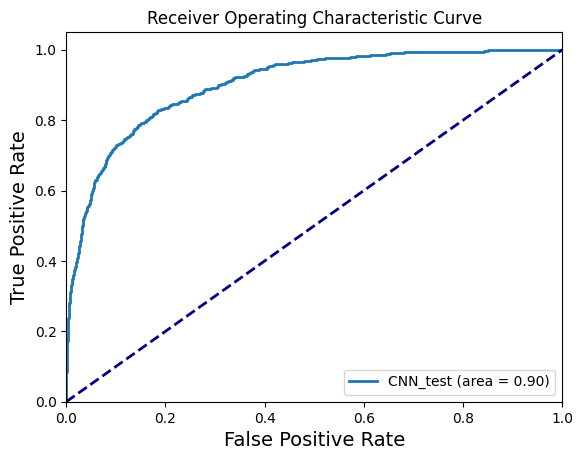

In [ ]:
roc_curve(y_pred, y_label, "CNN_test.png", "CNN_test")

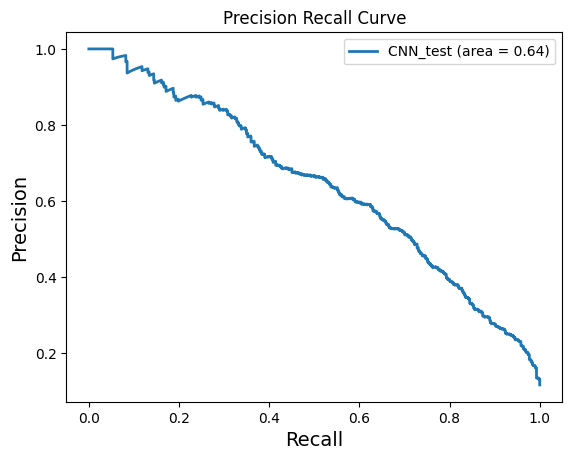

In [ ]:
prauc_curve(y_pred, y_label, "CNN_test.png", "CNN_test")